##          Московский авиационный институт
###      (Национальный исследовательский университет)
####   Институт №8 «Информационные технологии и прикладная математика»
####        Кафедра вычислительной математики и программирования

  
 
 





            Лабораторная работа № 1 
            по курсу «Нейроинформатика».
            
           

 
 
 







                                  Студент: Обыденкова Ю.Ю.
                                  Группа: 80-408Б
                                   


 

                        Москва, 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from functools import reduce

In [2]:
colors1 = ['m', 'c']
colors2 = [['m', 'c'], ['g', 'y']]

def Plot(df,number):
    if number == 1:
        plt.grid(True)
        plt.plot(df[df['y'] == 0]['x1'], df[df['y'] == 0]['x2'], 'o', c=colors1[0])
        plt.plot(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], 'o', c=colors1[1])
    elif number == 2:
        plt.grid(True)
        plt.plot(df[(df['y1'] == 0) & (df['y2'] == 0)]['x1'], df[(df['y1'] == 0) & (df['y2'] == 0)]['x2'], 'o', c=colors2[0][0])
        plt.plot(df[(df['y1'] == 1) & (df['y2'] == 1)]['x1'], df[(df['y1'] == 1) & (df['y2'] == 1)]['x2'], 'o', c=colors2[1][1])
        plt.plot(df[(df['y1'] == 0) & (df['y2'] == 1)]['x1'], df[(df['y1'] == 0) & (df['y2'] == 1)]['x2'], 'o', c=colors2[0][1])
        plt.plot(df[(df['y1'] == 1) & (df['y2'] == 0)]['x1'], df[(df['y1'] == 1) & (df['y2'] == 0)]['x2'], 'o', c=colors2[1][0])
    else:
        raise Exception("Invalid number of plot")

In [3]:
class Perceptron:
    def __init__(self, epochs=50,task=True):
        self.epochs = epochs
        
        self.weights = []
        self.bias = 0
        self.errors = []
        
    def Train(self, X, Y, task=True):
        random.seed(5)
        if task:
            self.weights = np.random.sample((2, 2))
            self.bias = np.random.sample(2)

        else:
            self.bias = random.random()
            self.weights = np.random.sample(2)

            
        iter = 0
        i = 0
        while i < X.shape[0]:
            print('iter: {} weights: {} bias: {}\n'.format(iter, self.weights, self.bias))
            if iter == self.epochs:
                break
            prediction = self.Predict(X[i], self.weights, self.bias)

            error = Y[i] - prediction
            self.errors.append(abs(error))            
            if (np.linalg.norm(error) != 0):
                #print('iter: {} weights: {} bias: {}\n'.format(iter, self.weights, self.bias))
                if task:
                    self.weights +=  X[i].reshape(-1, 1).dot(error.reshape(1, -1))
 
                else:
                    self.weights +=  X[i] * error

                self.bias += error

                i = -1
            i += 1
            iter += 1
        
        return self.weights, self.bias
    
    def MAE(self):
        return sum(self.errors) / len(self.errors)
    
    def F(self, x, w, b):
        return np.dot(x, w) + b
         
        
    def Predict(self, seq, weights, bias, task=True):
        if task:
            return np.heaviside(self.F(seq, weights, bias), 1)
        return 1 if self.F(seq, weights, bias) >= 0 else 0

    
def DividingLine(x, w0, w1, b):
    return (-w0 * x - b)/w1

### 1 выборка

In [4]:
X = np.array([[3, -3.8, -1.8, -1.1, -3.2, -4.8], [2.4, 0.2, 0.4, -0.9, -2.5, 4.2]], dtype=np.float32)
Y = np.array([0, 1, 1, 1, 1, 0])

ds = np.insert(X, 2, Y, axis=0)
df = pd.DataFrame(ds.T, columns=['x1', 'x2', 'y'])

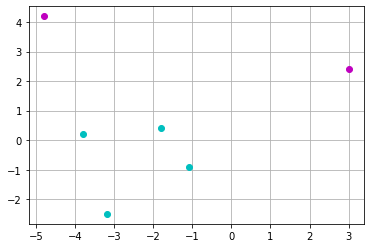

In [5]:
df
Plot(df,1)

### 2 выборка

In [6]:
X2 = np.array([[2, 2.3, 0.4, -1.9, -3.2, -0.4, 4.1, -5], [-1.3, 4.5, 0.4, -4.3, -4.1, -5, 1.4, -4.7]], dtype=np.float32)
Y2 = np.array([[0, 0, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1, 0]])

ds2 = np.insert(X2, 2, Y2, axis=0)
df2 = pd.DataFrame(ds2.T, columns=['x1', 'x2', 'y1', 'y2'])

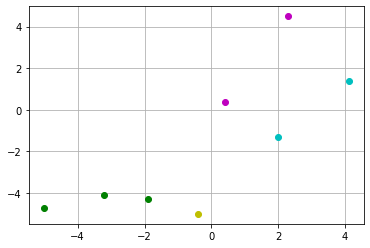

In [7]:
Plot(df2,2)

In [8]:
np.random.seed(3)
randSeqs = (np.random.uniform(-5, 5, (5, 2)))
#randSeqs

np.random.seed(3)
randY = np.random.randint(0, 2, 5)
randSeqs, randY

(array([[ 0.50797903,  2.08147823],
        [-2.09095261,  0.10827605],
        [ 3.92946954,  3.96293089],
        [-3.7441469 , -2.92757122],
        [-4.48532797, -0.59190156]]),
 array([0, 0, 1, 1, 0]))

Обучение персептрона на 1 обучающей выборке

In [9]:
model = Perceptron()
weights, bias = model.Train(X.T, Y, False)
print('weights: {}, bias: {}'.format(weights, bias))

iter: 0 weights: [0.12132858 0.56931133] bias: 0.6229016948897019

iter: 1 weights: [-2.87867142 -1.83068877] bias: -0.37709830511029807

iter: 2 weights: [-2.87867142 -1.83068877] bias: -0.37709830511029807

iter: 3 weights: [-2.87867142 -1.83068877] bias: -0.37709830511029807

iter: 4 weights: [-2.87867142 -1.83068877] bias: -0.37709830511029807

iter: 5 weights: [-2.87867142 -1.83068877] bias: -0.37709830511029807

iter: 6 weights: [-2.87867142 -1.83068877] bias: -0.37709830511029807

iter: 7 weights: [ 1.92132877 -6.03068858] bias: -1.377098305110298

iter: 8 weights: [ 1.92132877 -6.03068858] bias: -1.377098305110298

iter: 9 weights: [-1.87867118 -5.83068857] bias: -0.37709830511029807

iter: 10 weights: [-1.87867118 -5.83068857] bias: -0.37709830511029807

iter: 11 weights: [-1.87867118 -5.83068857] bias: -0.37709830511029807

iter: 12 weights: [-1.87867118 -5.83068857] bias: -0.37709830511029807

iter: 13 weights: [-1.87867118 -5.83068857] bias: -0.37709830511029807

iter: 14 w

In [10]:
model.MAE()

0.2

In [11]:
pred = [model.Predict(line, weights, bias, False) for line in randSeqs]
pred

[0, 1, 0, 1, 1]

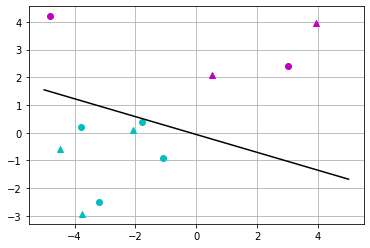

In [12]:
Plot(df,1)
area = np.linspace(-5, 5, 10)
line = DividingLine(area, weights[0], weights[1], bias)
plt.plot(area, line, color='black')

for x, y, color in zip(randSeqs[:, 0], randSeqs[:, 1], pred):
    plt.plot(x, y, "^", c=colors1[color])

Изменим первую обучающую выборку так, чтобы она стала линейно неразделимой и обучим нейросеть на ней

In [13]:
X_ = np.array([[3, -3.8, -1.8, -1.1, -3.2, -4.8], [2.4, 0.2, 0.4, -0.9, -2.5, 4.2]], dtype=np.float32)
Y_ = np.array([1, 0, 1, 0, 1, 1])

ds_ = np.insert(X_, 2, Y, axis=0)
df_ = pd.DataFrame(ds.T, columns=['x1', 'x2', 'y'])

In [14]:
model_ = Perceptron()
weights_, bias_ = model_.Train(X_.T, Y_, False)
print('weights: {}, bias: {}'.format(weights_, bias_))

iter: 0 weights: [0.43706194 0.01874801] bias: 0.6229016948897019

iter: 1 weights: [0.43706194 0.01874801] bias: 0.6229016948897019

iter: 2 weights: [0.43706194 0.01874801] bias: 0.6229016948897019

iter: 3 weights: [-1.36293801  0.41874801] bias: 1.622901694889702

iter: 4 weights: [1.63706199 2.81874811] bias: 2.622901694889702

iter: 5 weights: [1.63706199 2.81874811] bias: 2.622901694889702

iter: 6 weights: [1.63706199 2.81874811] bias: 2.622901694889702

iter: 7 weights: [1.63706199 2.81874811] bias: 2.622901694889702

iter: 8 weights: [1.63706199 2.81874811] bias: 2.622901694889702

iter: 9 weights: [-1.56293806  0.31874811] bias: 3.622901694889702

iter: 10 weights: [1.43706194 2.71874821] bias: 4.622901694889702

iter: 11 weights: [1.43706194 2.71874821] bias: 4.622901694889702

iter: 12 weights: [1.43706194 2.71874821] bias: 4.622901694889702

iter: 13 weights: [1.43706194 2.71874821] bias: 4.622901694889702

iter: 14 weights: [2.53706197 3.61874818] bias: 3.622901694889702

In [15]:
model_.MAE()

0.32

In [16]:
pred_ = [model.Predict(line, weights_, bias_, False) for line in randSeqs]
pred_

[1, 0, 1, 0, 0]

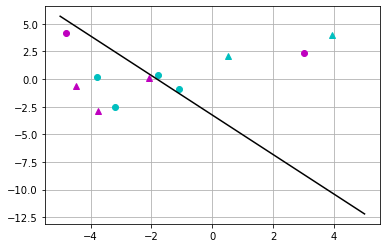

In [17]:
Plot(df_,1)
area = np.linspace(-5, 5, 10)
line = DividingLine(area, weights_[0], weights_[1], bias_)
plt.plot(area, line, color='black')

for x, y, color in zip(randSeqs[:, 0], randSeqs[:, 1], pred_):
    plt.plot(x, y, "^", c=colors1[color])

Обучение на 2 выборке:

In [18]:
model2 = Perceptron()
weights2, bias2 = model2.Train(X2.T, Y2.T, True)

iter: 0 weights: [[0.04063074 0.2478883 ]
 [0.0935515  0.69482365]] bias: [0.14537014 0.4531723 ]

iter: 1 weights: [[-1.95936926  0.2478883 ]
 [ 1.39355145  0.69482365]] bias: [-0.85462986  0.4531723 ]

iter: 2 weights: [[-1.95936926  0.2478883 ]
 [ 1.39355145  0.69482365]] bias: [-0.85462986  0.4531723 ]

iter: 3 weights: [[-4.25936922 -2.05211166]
 [-3.10644855 -3.80517635]] bias: [-1.85462986 -0.5468277 ]

iter: 4 weights: [[-4.25936922 -2.05211166]
 [-3.10644855 -3.80517635]] bias: [-1.85462986 -0.5468277 ]

iter: 5 weights: [[-4.25936922 -2.05211166]
 [-3.10644855 -3.80517635]] bias: [-1.85462986 -0.5468277 ]

iter: 6 weights: [[-4.25936922 -2.05211166]
 [-3.10644855 -3.80517635]] bias: [-1.85462986 -0.5468277 ]

iter: 7 weights: [[-4.25936922 -0.15211168]
 [-3.10644855  0.49482384]] bias: [-1.85462986 -1.5468277 ]

iter: 8 weights: [[-4.25936922  1.84788832]
 [-3.10644855 -0.80517611]] bias: [-1.85462986 -0.5468277 ]

iter: 9 weights: [[-4.25936922  1.84788832]
 [-3.10644855 -0.

In [19]:
print('weights: {}, bias: {}'.format(weights2, bias2))

weights: [[-4.25936922  1.44788834]
 [-3.10644855 -1.00517592]], bias: [-1.85462986 -2.5468277 ]


In [20]:
model2.MAE()

array([0.09090909, 0.22727273])

In [21]:
pred2 = [model.Predict(line, weights2, bias2, True) for line in randSeqs]
pred2

[array([0., 0.]),
 array([1., 0.]),
 array([0., 0.]),
 array([1., 0.]),
 array([1., 0.])]

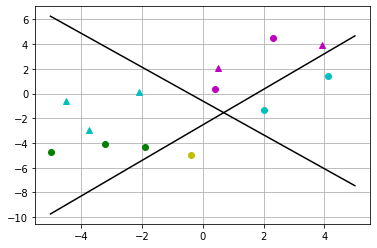

In [22]:
Plot(df2,2)
area = np.linspace(-5, 5, 10)
line1 = DividingLine(area, weights2[0][0], weights2[1][0], bias2[0])
line2 = DividingLine(area, weights2[0][1], weights2[1][1], bias2[1])
plt.plot(area, line1, color='black')
plt.plot(area, line2, color='black')


for x, y, color in zip(randSeqs[:, 0], randSeqs[:, 1], pred):
    plt.plot(x, y, "^", c=colors1[color])